<a href="https://colab.research.google.com/github/cayoc9/Store-sales-predictive-Rossman-challenge/blob/main/01_Analise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.0 imports

In [ ]:
! pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 0.1 Helper Function

### 0.2 Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Caminho dos dados: "/content/drive/Shareddrives/Drive Cayo.Edu/1 - PROJETOS/Profissional - Cientista de dados/Estudo Ciencia de Dados/Projeto Rossmann Store/rossmann-store-sales"
# Train : /content/drive/Shareddrives/Drive Cayo.Edu/1 - PROJETOS/Profissional - Cientista de dados/Estudo Ciencia de Dados/Projeto Rossmann Store/rossmann-store-sales/train.csv
# store: /content/drive/Shareddrives/Drive Cayo.Edu/1 - PROJETOS/Profissional - Cientista de dados/Estudo Ciencia de Dados/Projeto Rossmann Store/rossmann-store-sales/store.csv
#


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_sales_raw = pd.read_csv('/content/drive/Shareddrives/Drive Cayo.Edu/1 - PROJETOS/Profissional - Cientista de dados/Estudo Ciencia de Dados/Projeto Rossmann Store/rossmann-store-sales/train.csv', low_memory=False)
df_store_raw = pd.read_csv('/content/drive/Shareddrives/Drive Cayo.Edu/1 - PROJETOS/Profissional - Cientista de dados/Estudo Ciencia de Dados/Projeto Rossmann Store/rossmann-store-sales/store.csv', low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')



OSError: ignored


* Id - um Id que representa uma duplicata (Store, Date) dentro do conjunto de teste

* Store - um ID exclusivo para cada loja

* Sales  - o volume de negócios para um determinado dia (isto é o que você está prevendo)

* Customers  - o número de clientes em um determinado dia

* Open  - um indicador para saber se a loja estava aberta: 0 = fechado, 1 = aberto

* StateHoliday - indica um feriado estadual. Normalmente todas as lojas, com poucas exceções, fecham nos feriados estaduais. Observe que todas as escolas fecham nos feriados e fins de semana. a = feriado, b = feriado da Páscoa, c = Natal, 0 = nenhum

* SchoolHoliday - indica se o (Store, Date) foi afetado pelo fechamento das escolas públicas

* StoreType  - diferencia entre 4 modelos de loja diferentes: a, b, c, d

* Assortment  - descreve um nível de sortimento: a = básico, b = extra, c = estendido

* CompetitionDistance - distância em metros até a loja concorrente mais próxima

* CompetitionOpenSince[Month/Year] - fornece o ano e o mês aproximados da hora em que o concorrente mais próximo foi aberto

* Promo - indica se uma loja está realizando uma promoção naquele dia

* Promo2 - Promo2 é uma promoção contínua e consecutiva para algumas 
lojas: 0 = loja não está participando, 1 = loja está participando

* Promo2Since[Year/Week] - descreve o ano e a semana do calendário em que a loja começou a participar do Promo2

* PromoInterval - descreve os intervalos consecutivos em que o Promo2 é iniciado, nomeando os meses em que a promoção é reiniciada. Por exemplo, "fevereiro, maio, agosto, novembro" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para essa loja

## 1.0 Descrição dos dados

### 1.1 Rename Columns

In [ ]:
# copiar tabela caso precise resetar ela no futuro
df1 = df_raw.copy()

In [ ]:
#salvar todas as colunas em uma variavel
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 
           'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
           'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
#criar uma função lambda com inflect
snakecase = lambda x: inflection.underscore(x)

#aplicar um mapeamento dessa função aplicada à todas as palavras do vertor cols_old e salvar como uma lista em outra variavel
cols_new =  list(map( snakecase, cols_old))

# rename colunas
df1.columns = cols_new

### 1.2 Data Dimensions

In [ ]:
# calcular quantidade de linhas e colunas da tabela
print( f'Numero de Linhas: {df1.shape[0]} ')
print( f'Numero de Colunas: {df1.shape[1]} ')

Numero de Linhas: 1017209 
Numero de Colunas: 18 


### 1.3 Data Types

In [ ]:
#transforma data em tipo d dados datetime
df1['date'] = pd.to_datetime(df1['date'])

In [ ]:
# calcular tipos de dados
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4 Check NA

In [ ]:
# verificar todas as colunas que tem pelo menos uma linha NA
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64



---


Esse resultado influencia a proxima decisao sobre o que fazer, normalmente temos 3 Opçoes:

1.   Apagar linhas que tem elementos NA

*   Se o Conjunto de dados for pequena, isso afetará o resultado dos algoritimos
*   Mais simples das soluçoes
*   As linhas excluidas excluirá dados que podem revelar outros padroes


2.   Recuperar esses dados atravez de um algoritmo de machine learning

* Mais complicado de usar
* Usada alritmos de machine learning para tertar tirar uma media ou prever qual seria a resposta com base em outros dados

3.   Recuperar esses dados com o entendimento das regras do negocio

* Gerar valores reais do porque aquele dado foi NA
* Gera valores mais precisos pelo entendimento do negocios aprofundado





### 1.5 Fillout NA

In [ ]:
# analisar dado por questoes de negocios


# 1. Se a distancia é considerada NA, provavelmente nao tem ou está muito longe para ser considerado, logo vamos colocar uma distancia muito maior que a distancia maxima nos dados
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 2000000.0 if math.isnan(x) else (x) )


# 2. competition_open_since_month: Mes aproximado que o concorrente mais proximo foi abertor
#    Existem duas possiblidades, ou a concorrente mais proxima nao existe, ou nao temos esse dado, tanto porque é muito antiga quanto porque esqueceram de anotar
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis=1 )

# 3. competition_open_since_year: Ano aproximado que o concorrente mais proximo foi abertor
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis=1 )


# 4. promo2_since_week:  Descreve qual semana do calendario a loja começou a participar da promo2        
#     se a celula esta NA, significa que a loja nao participou daquela promoçao
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis=1 )



# 5. promo2_since_year:  Descreve qual ano a loja começou a participar da promo2
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis=1 )

# 6. promo_interval: Descreve os intervalos que a promoção ficou ativa em listas de meses (Ex: Feb. May, Jun, Aug)

#Criei um dicionario para linkar o mes ao seu numero equivalente  
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dez'}

# aqui usamos o metodo fillna para substituir os elementos NA por 0 na tabela de data
df1['promo_interval'].fillna(0, inplace=True)

# Criar uma nova coluna "month_map" e atribuir pra ela o resultado de transforma a coluna 'date' em data, 
# depois separar apenas o mes e aplicar um mapeamento substituindo todos os numeros para as letras equivalentes do Dict "mounth_map"  
df1['month_map'] = df1['date'].dt.month.map(month_map) 

# Aqui criamos uma nova coluna pra informar se a loja participou da promoção no mes referente 
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1) 



In [ ]:
#df1.isna().sum()

### 1.6 Change Types (Estatistica Descritiva) 

In [ ]:
# Verificar os Tipos atuais dos dados, todas a operaçoes a tratamentos feitos podem ter alterado seus tipos
df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [ ]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.7 Descriptive Statistical (Descrição Estatistica) 

In [ ]:
# Central Tendency - mean, median

# Dispension - std, min, max, range, skew, kurtosis

In [ ]:
num_atributes = df1.select_dtypes( include= ['int64', 'float64'])
cat_atributes = df1.select_dtypes( exclude= ['int64', 'float64'])

#### Utilidade da estatistica descritiva:


1.  Entender sobre o negocios
2.  Detectar erros 

* Metricas de Estatistica descritiva
  * Metricas de Dispersão (1° ordem)
     * Desvio Padrão (std)
     * Min
     * Max
     * Range (Valor Entre Min e Max)
     * Skew (Distribuição da Deformação em Relação a Normal)
     * Kurtosis (Nivel de Concentração dos dados)
  * Metricas de Tendencia Central (1° ordem)
     * Media
     * Mediana

#### 1.7.1 Numerical Attributes - Descriptive Statistical 

In [ ]:
num_atributes.sample(3)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
922995,561,2,9170,833,1,1,1,14300.0,3,2013,0,13,2013,0
365219,891,6,7859,1123,1,0,0,350.0,8,2014,1,31,2013,1
17197,473,4,4021,496,1,1,1,50.0,7,2015,0,29,2015,0


In [ ]:

# Central Tendency - mean, median
ct1 = pd.DataFrame(num_atributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_atributes.apply(np.median)).T

# Dispension - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame(num_atributes.apply( np.std )).T
d2 = pd.DataFrame(num_atributes.apply( min )).T
d3 = pd.DataFrame(num_atributes.apply( max )).T
d4 = pd.DataFrame(num_atributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_atributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_atributes.apply( lambda x: x.kurtosis() )).T

# contatenar as listas
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']


In [ ]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,2000000.0,1999980.0,10610.588099,2330.0,101810.649100,19.378002,375.644405
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


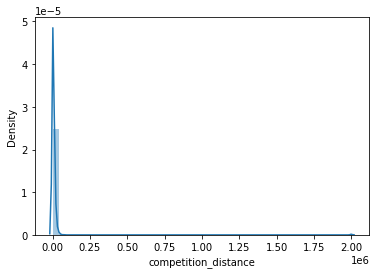

In [ ]:
sns.distplot(df1['competition_distance'])

#### 1.7.2 Categorical Attributes - Descriptive Statistical 

In [ ]:
#visualizar quantas variaçoes de cada elemento categorico existem
cat_atributes.apply(lambda x: x.unique().shape[0])


date              942
state_holiday       4
store_type          4
assortment          3
promo_interval      4
month_map          12
dtype: int64

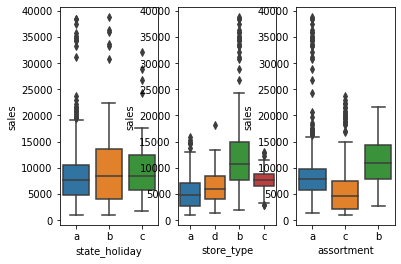

In [ ]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux1)
plt.subplot(1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux1)